# MODNet - Portrait Image Matting Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/pdf/2011.11961.pdf)          [![GitHub stars](https://img.shields.io/github/stars/ZHKKKe/MODNet?style=social)](https://github.com/ZHKKKe/MODNet)

<p align="justify">This is a <b>Portrait Image Matting Demo</b> of our paper ''<a href="https://arxiv.org/pdf/2011.11961.pdf">Is a Green Screen Really Necessary for Real-Time Portrait Matting?</a>''. We propose a trimap-free MODNet for portrait matting in real time (on a single GPU). If you want to try portrait video matting with MODNet, please refer to our <b>Real-Time Portrait Video Matting Demo</b> based on WebCam [<a href="https://colab.research.google.com/drive/1Pt3KDSc2q7WxFvekCnCLD8P0gBEbxm6J?usp=sharing">online demo</a>] [<a href="https://github.com/ZHKKKe/MODNet/tree/master/demo/video_matting">offline demo</a>].</p>

<img src="https://raw.githubusercontent.com/ZHKKKe/MODNet/develop/doc/gif/image_matting_demo.gif" width="40%">

<p align="justify">In this demo, we provide a pre-trained MODNet for photographic portrait images (<i>e.g.</i>, the image from <a href="https://www.flickr.com/">Flickr</a>). Of course, this model can also handle the portrait images from other data domains (<i>e.g.</i>, the image captured by smartphone). Note that <b><font color='#FF000'>our model may still fail in some cases (<i>e.g.</i>, complex backgrounds and challenging poses/costumes) due to our relatively small labeled training set (only 3k labeled foregrounds)</font></b>.</p>

### **Let's start!**

## 1. Preparation

<p align="justify">In the top menu of this session, select <b>Runtime -> Change runtime type</b>, and set <b>Hardware Accelerator</b> to <b>GPU</b>.</p>

<p align="justify">Clone the repository, and download the pre-trained model:</p>


In [1]:
import os

# clone the repository
%cd /content
if not os.path.exists('MODNet'):
  !git clone https://github.com/ZHKKKe/MODNet
%cd MODNet/

# dowload the pre-trained ckpt for image matting
pretrained_ckpt = 'pretrained/modnet_photographic_portrait_matting.ckpt'
if not os.path.exists(pretrained_ckpt):
  !gdown --id 1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz \
          -O pretrained/modnet_photographic_portrait_matting.ckpt


/content
Cloning into 'MODNet'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (276/276), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 276 (delta 102), reused 252 (delta 95), pack-reused 0 (from 0)
Receiving objects: 100% (276/276), 60.77 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/MODNet
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mcr7ALciuAsHCpLnrtG_eop5-EYhbCmz
To: /content/MODNet/pretrained/modnet_photographic_portrait_matting.ckpt
100% 26.3M/26.3M [00:00<00:00, 54.1MB/s]


## 2. Upload Images

<p align="justify">Upload portrait images to be processed (only PNG and JPG format are supported):</p>

In [2]:
import shutil
from google.colab import files

# clean and rebuild the image folders
input_folder = 'demo/image_matting/colab/input'
if os.path.exists(input_folder):
  shutil.rmtree(input_folder)
os.makedirs(input_folder)

output_folder = 'demo/image_matting/colab/output'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
os.makedirs(output_folder)

# upload images (PNG or JPG)
image_names = list(files.upload().keys())
for image_name in image_names:
  shutil.move(image_name, os.path.join(input_folder, image_name))


Saving IMG_20230505_164625.jpg to IMG_20230505_164625.jpg
Saving Screenshot_2023-04-02-19-50-53-391_com.miui.gallery.jpg to Screenshot_2023-04-02-19-50-53-391_com.miui.gallery.jpg


## 3. Inference

<p align="justify">Run the following command for alpha matte prediction:</p>

In [3]:
!python -m demo.image_matting.colab.inference \
        --input-path demo/image_matting/colab/input \
        --output-path demo/image_matting/colab/output \
        --ckpt-path ./pretrained/modnet_photographic_portrait_matting.ckpt


/content/MODNet/demo/image_matting/colab/inference.py:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(args.ckpt_path)
Process image: IMG_20230505_1646

## 4. Visualization

<p align="justify">Display the results (from left to right: image, foreground, and alpha matte):</p>

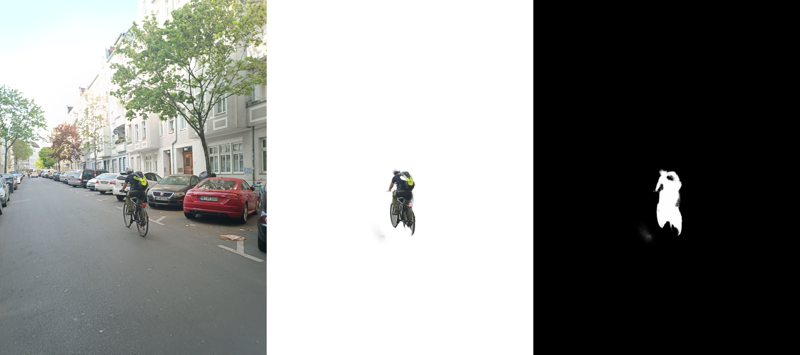

IMG_20230505_164625.jpg 



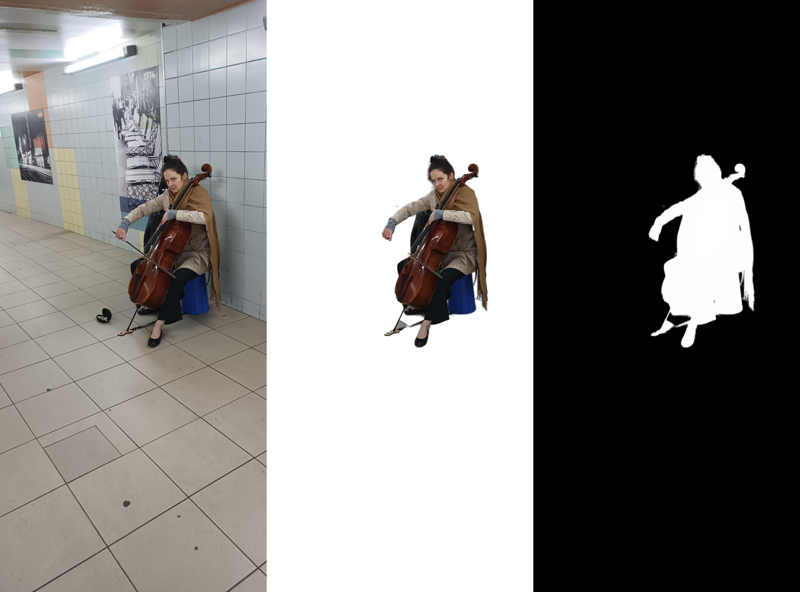

Screenshot_2023-04-02-19-50-53-391_com.miui.gallery.jpg 



In [4]:
import numpy as np
from PIL import Image

def combined_display(image, matte):
  # calculate display resolution
  w, h = image.width, image.height
  rw, rh = 800, int(h * 800 / (3 * w))

  # obtain predicted foreground
  image = np.asarray(image)
  if len(image.shape) == 2:
    image = image[:, :, None]
  if image.shape[2] == 1:
    image = np.repeat(image, 3, axis=2)
  elif image.shape[2] == 4:
    image = image[:, :, 0:3]
  matte = np.repeat(np.asarray(matte)[:, :, None], 3, axis=2) / 255
  foreground = image * matte + np.full(image.shape, 255) * (1 - matte)

  # combine image, foreground, and alpha into one line
  combined = np.concatenate((image, foreground, matte * 255), axis=1)
  combined = Image.fromarray(np.uint8(combined)).resize((rw, rh))
  return combined

# visualize all images
image_names = os.listdir(input_folder)
for image_name in image_names:
  matte_name = image_name.split('.')[0] + '.png'
  image = Image.open(os.path.join(input_folder, image_name))
  matte = Image.open(os.path.join(output_folder, matte_name))
  display(combined_display(image, matte))
  print(image_name, '\n')


## Download Results

<p align="justify">Download the Zip package of predicted alpha mattes:</p>

In [5]:
zip_filename = 'matte.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)

os.system(f"zip -r -j {zip_filename} {output_folder}/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>